In [6]:
import pandas as pd
import numpy as np
import seaborn as sns


In [7]:
 %matplotlib inline

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [9]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


**What is my research question? **:
* Among Hispanic patients in this dataset, which gender receives more diabetes medication? Males or females?

In [10]:
#Drop uneeded columns or select only specific columns

df1 = df[['race','gender','age','time_in_hospital','diabetesMed']]

In [11]:
#Kept interesting variables in the new dataframe

df1.head(7)

,race,gender,age,time_in_hospital,diabetesMed
0,Caucasian,Female,[0-10),1,No
1,Caucasian,Female,[10-20),3,Yes
2,AfricanAmerican,Female,[20-30),2,Yes
3,Caucasian,Male,[30-40),2,Yes
4,Caucasian,Male,[40-50),1,Yes
5,Caucasian,Male,[50-60),3,Yes
6,Caucasian,Male,[60-70),4,Yes


In [34]:
#Filtered to only keep Hispanic patients
df2= df1[df['race'] == 'Hispanic'] 

In [13]:
df2.head(10)

,race,gender,age,time_in_hospital,diabetesMed
223,Hispanic,Female,[70-80),6,No
373,Hispanic,Male,[20-30),1,Yes
390,Hispanic,Female,[40-50),1,No
456,Hispanic,Female,[60-70),6,Yes
523,Hispanic,Female,[80-90),9,No
529,Hispanic,Female,[70-80),6,No
961,Hispanic,Female,[50-60),2,Yes
968,Hispanic,Male,[20-30),4,Yes
1027,Hispanic,Female,[70-80),8,Yes
1031,Hispanic,Female,[70-80),6,No


In [35]:
df2['gender'].value_counts()

Female    1092
Male       945
Name: gender, dtype: int64

* Using this line of code I was able to discover that in this data set there are slighlty more Hispanic females than Hispanic males, and that might possibly be a small bias.





In [15]:
df2['age'].value_counts()

[60-70)     489
[50-60)     403
[70-80)     386
[40-50)     337
[30-40)     174
[80-90)     141
[20-30)      63
[10-20)      23
[90-100)     19
[0-10)        2
Name: age, dtype: int64

* With this line of code, it appears that patients were mostly the elderly

* Ages for this data set range from 0 to 100 years old.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ac3ab3910>]],
      dtype=object)

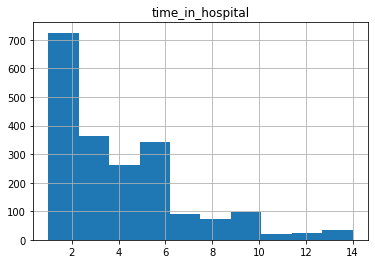

In [16]:
df2.hist()

* This histogram shows that most people spend 2-6 days admitted in the hosipital

**Average number of days that Male and Female Hispanic patients spent admitted:**

In [17]:
df2.groupby(['gender'])['time_in_hospital'].mean()

gender
Female    4.086081
Male      4.029630
Name: time_in_hospital, dtype: float64

* Among females the average number of days spent in a hospital is **4**
* Among males the average number of days spent in a hospital is also **4**

In [32]:
df2['diabetesMed'].value_counts()

Yes    1551
No      486
Name: diabetesMed, dtype: int64

In [19]:
df2.shape

(2037, 5)

In [20]:
df3 = df2[['race', 'gender', 'diabetesMed']]

In [21]:
#QUERY CODE/LINE TO FILTER FOR PATIENTS WHO WERE PRESCRIBED DIABETES MEDICATION
dfdia = df3.query("diabetesMed == 'Yes'")

In [22]:
dfdia.head(10)

,race,gender,diabetesMed
373,Hispanic,Male,Yes
456,Hispanic,Female,Yes
961,Hispanic,Female,Yes
968,Hispanic,Male,Yes
1027,Hispanic,Female,Yes
1097,Hispanic,Female,Yes
1117,Hispanic,Male,Yes
1125,Hispanic,Female,Yes
1228,Hispanic,Male,Yes
1253,Hispanic,Male,Yes


In [23]:
dfdia.groupby(['gender'])['diabetesMed'].count()

gender
Female    826
Male      725
Name: diabetesMed, dtype: int64

In [36]:
df2dia = dfdia.groupby(['gender'])['diabetesMed'].count()

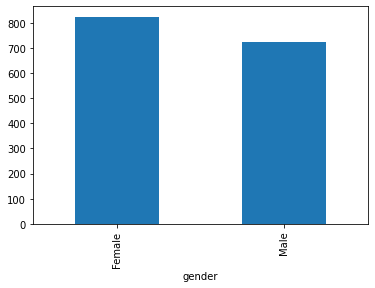

In [29]:
df2dia.plot.bar(x = 'gender', y = 'diabetesMed')

* This bargraph was able to display a visual comparison between  male and female Hispanic patients, and highlights the differences between which gender recieved more diabetes medication. 

Results show that:
* There were **826** females who recieved diabetes medication.

* There were **725** males who receved diabetes medication.

---

However,

knowing from DataFrame2(df2) that there were more female patients than male patients overall, it does mean that this analysis was a bit skewed to begin with.

